# Start over with basic data

April 9, 2021

Want to build/rebuild knowledge of basics of simple linear regression:
- Correlation function in numpy?
- Centroid concept
- Manually build up the regression line
- Start with a basic data set

All based on this <a href='https://www.youtube.com/watch?v=ZkjP5RJLQF4&list=PLIeGtxpvyG-LoKUpV0fSY8BGKIMIdmfCi&index=1'>excellent video series</a>.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1.0 Build the array from the video series' 6 observations

<img src = 'tips.jpg' width = 250>

In [4]:
dict = {'bill': [34, 108, 64, 88, 99, 51], 'tip': [5, 17, 11, 8, 14, 5]}
df = pd.DataFrame(dict, index = None)
df

,bill,tip
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14
5,51,5


- bill is independent var = x
- tip is dependent var = y

#### Correlation

In [29]:
df.bill.corr(df.tip)

0.8656649996294481

#### Scatterplot

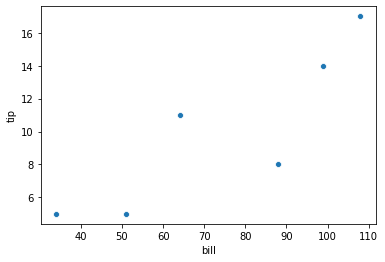

In [31]:
sns.scatterplot(df.bill, df.tip)

## 2.0 Let's get the residuals, assuming fit-line has slope of zero

In [14]:
tip_mean = df.tip.mean()
tip_mean

10.0

In [19]:
df['residuals'] = (tip_mean - df.tip)**2

In [24]:
df

,bill,tip,residuals
0,34,5,25.0
1,108,17,49.0
2,64,11,1.0
3,88,8,4.0
4,99,14,16.0
5,51,5,25.0


### 2.1 Sum of squares

In [25]:
SSE = df.residuals.sum()

In [27]:
SSE

120.0

## 3.0 Do linear regression in numpy

### 3.1 Build numpy array

In [35]:
arr = df[['bill', 'tip']].to_numpy()

In [36]:
arr

array([[ 34,   5],
       [108,  17],
       [ 64,  11],
       [ 88,   8],
       [ 99,  14],
       [ 51,   5]], dtype=int64)

### 3.2 Isolate x and y variables
- x = independent = 'bill'
- y = dependent = 'tip'

In [54]:
X = arr[:,0]
Y = arr[:,1]
X

array([ 34, 108,  64,  88,  99,  51], dtype=int64)

In [56]:
X = np.reshape(X, (-1, 1))
Y = np.reshape(Y, (-1, 1))
X

array([[ 34],
       [108],
       [ 64],
       [ 88],
       [ 99],
       [ 51]], dtype=int64)

### 3.3 Do regression

<a href = 'https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d'>Source</a>

In [43]:
from sklearn.linear_model import LinearRegression as linreg

In [44]:
reg = linreg()

In [59]:
Y_pred = reg.fit(X, Y)

### 3.4 Get slope coefficient = b1

In [71]:
slope = b1 = reg.coef_[0][0]
b1

0.14621968616262487

### 3.5 Get y intercept = b0

#### Since: y = (b1·x) + b0:
- b0 = (b1·x) - y

#### I need:
- b1
- mean of x
- mean of y

#### Remember what the slope is

In [77]:
b1

0.14621968616262487

#### Get the centroid... aka the means of x and y
- The least-squares line must go through the centroid

In [93]:
x_bar = arr[:,0].mean()
y_bar = arr[:,1].mean()

In [94]:
b0 = (b1 * x_bar) - y_bar
b0

0.8202567760342401

### ^^ Correct!!

## Export array

In [96]:
np.save("../data/basic_arr", arr)

TypeError: can't multiply sequence by non-int of type 'tuple'

## Sandbox

In [99]:
x, y = arr[0]
x, y

(34, 5)

In [100]:
arr

array([[ 34,   5],
       [108,  17],
       [ 64,  11],
       [ 88,   8],
       [ 99,  14],
       [ 51,   5]], dtype=int64)

#### Scale x_factor

In [106]:
x_max = arr[:,0].max()
x_max

108

In [107]:
w = 1400

In [111]:
x_scale = round(w / x_max, 1)
x_scale

13.0

In [112]:
arr[:,0] * x_scale

array([ 442., 1404.,  832., 1144., 1287.,  663.])